# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [19]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [20]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
#Convert to  YUV space from RGB  (formula from https://en.wikipedia.org/wiki/YUV) as described in the above paper
#Y = 0.299R +0.587G+0.114B
import numpy as np
from skimage import exposure


X_train = 0.299*X_train[:,:,:,0]+0.587*X_train[:,:,:,1]+0.114*X_train[:,:,:,2]
X_train = (X_train/255.).astype(np.float32)  #scale between 0 and 1

for i in range(X_train.shape[0]):
    X_train[i] = exposure.equalize_hist(X_train[i])


print(X_train.shape)
X_train = X_train.reshape(X_train.shape+(1,))



X_test = 0.299*X_test[:,:,:,0]+0.587*X_test[:,:,:,1]+0.114*X_test[:,:,:,2]
X_test = (X_test/255.).astype(np.float32)

for i in range(X_test.shape[0]):
    X_test[i] = exposure.equalize_hist(X_test[i])


X_test = X_test.reshape(X_test.shape+(1,))


(39209, 32, 32)


39209
12581
8


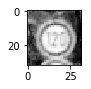

In [21]:
import random
print(len(X_train))
index = random.randint(0, len(X_train))
print(index)
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap= plt.get_cmap('gray'))
print(y_train[index])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Initially I tried normailizing RGB values(255*R/(R+G+B) and  trained and tested with standard MNIST -LeNet architecture. It gave very poor formance(61% on test data).

After reading the paper http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf, converted to YUV channel.
Unsing LeNet archictecutre, I got accurcy on validation and test data as below:

                  validation accuracy(%)               test accuracy
YUV channels           86.5                             74.2

Y channel only         96                               88.3

Finally I settled to use Y channel only.

Also, experimenting with histogram equalizers, it looks for equalize_hist for hostogram equalization seemed working well for me.

[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]
2250


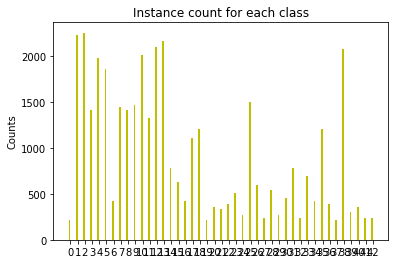

In [28]:
#Generate number of examples per class
import numpy as np
import matplotlib.pyplot as plt

#print a
class_counts = [0 for i in range(n_classes)]
for v in y_train:
    class_counts[v] += 1

ind =  np.arange(n_classes)
width = 0.25

print(class_counts)
print(max(class_counts))

fig,ax = plt.subplots()
rects = ax.bar(ind, class_counts, width, color='y')
ax.set_ylabel('Counts')
ax.set_title('Instance count for each class')
ax.set_xticks(ind+width/2)
ax.set_xticklabels(ind)

plt.show()

In [29]:
sample_threshold = 1400
classes_to_sample = np.uint8(np.where(np.array(class_counts)<sample_threshold))
print(classes_to_sample)

[[ 0  6 11 14 15 16 17 18 19 20 21 22 23 24 26 27 28 29 30 31 32 33 34 35
  36 37 39 40 41 42]]


In [30]:
#sample instances
X_sampled = np.empty((0,X_train.shape[1], X_train.shape[2],X_train.shape[3]), np.float32)
y_sampled = np.empty(0, np.uint8)
#print(type(y_train[0]))
#print(type(classes_to_sample[0]))
#print(np.where(y_train==classes_to_sample[0,0]))

for cls in classes_to_sample[0]:
    max_samples = np.random.randint(1400, 2250, 1)[0]
    nb_samples_need = max_samples-class_counts[cls]
    cls_instance_ids = np.where(y_train==cls)
    #print("class %d ", cls)
    #print(cls_instance_ids)
    x_cls_train =  X_train[cls_instance_ids]
    sampled_ids = np.random.randint(0, len(cls_instance_ids), size=nb_samples_need)
    sampled_instances = x_cls_train[sampled_ids]
    sampled_classes = np.full((nb_samples_need), cls, dtype=np.uint8)
    #print(X_sampled.shape)
    X_sampled = np.concatenate((X_sampled, sampled_instances), axis=0)
    y_sampled = np.concatenate((y_sampled, sampled_classes), axis=0)
    
print(len(X_sampled)) 
print(len(y_sampled)) 



39645
39645


39645
12167
21


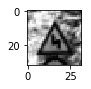

In [31]:
import random
print(len(X_sampled))
index = random.randint(0, len(X_sampled))
print(index)
image = X_sampled[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap= plt.get_cmap('gray'))
print(y_sampled[index])

In [32]:
#add sampled instances to trainining set
X_train = np.concatenate((X_train, X_sampled), axis=0)
y_train = np.concatenate((y_train, y_sampled), axis=0)

print(len(X_train))
print(len(y_train))


78854
78854


[2213, 2220, 2250, 1410, 1980, 1860, 1510, 1440, 1410, 1470, 2010, 2113, 2100, 2160, 2063, 1565, 1904, 2127, 1791, 1464, 1848, 1655, 1854, 2064, 1922, 1500, 1490, 1514, 2223, 2228, 2025, 1640, 1543, 1756, 1567, 2002, 1806, 2010, 2070, 1700, 1762, 1411, 2204]
2250


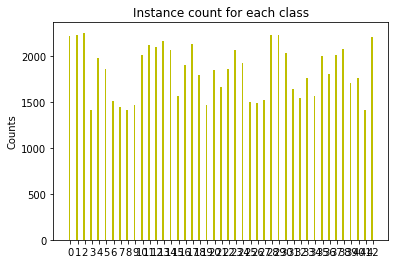

In [33]:
#Generate number of examples per class after up sampling
import numpy as np
import matplotlib.pyplot as plt

#print a
class_counts = [0 for i in range(n_classes)]
for v in y_train:
    class_counts[v] += 1

ind =  np.arange(n_classes)
width = 0.25

print(class_counts)
print(max(class_counts))

fig,ax = plt.subplots()
rects = ax.bar(ind, class_counts, width, color='y')
ax.set_ylabel('Counts')
ax.set_title('Instance count for each class')
ax.set_xticks(ind+width/2)
ax.set_xticklabels(ind)

plt.show()


In [34]:
#jitter the data
#X_train_vals = 
from skimage.util import random_noise

def add_noise(X):
    X_noise = np.zeros(X.shape, np.float32)
    for i in range(X.shape[0]):
        X_noise[i] = random_noise(X[i], mode='gaussian')
    return X_noise

X_noise = add_noise(X_train)
y_noise = np.array(y_train, copy=True)



78854
71052
36


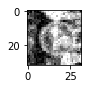

In [35]:
import random
print(len(X_noise))
index = random.randint(0, len(X_noise))
print(index)
image = X_noise[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap= plt.get_cmap('gray'))
print(y_train[index])

78854
25203
18


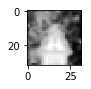

In [36]:
#add scaling

from skimage import transform

def add_rescale(X):
    X_scaled = np.zeros(X.shape, np.float32)
    for i in range(X.shape[0]):
        X_scaled[i] = transform.resize(transform.rescale(X[i], (0.9, 1.1)), (32,32))
    return X_scaled

X_scaled = add_rescale(X_train)
y_scaled = np.array(y_train, copy=True)


print(len(X_scaled))
index = random.randint(0, len(X_scaled))
print(index)
image = X_scaled[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap= plt.get_cmap('gray'))
print(y_scaled[index])





78854
13813
9


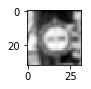

In [37]:
from skimage import transform

def add_rotation(X):
    X_rotated = np.zeros(X.shape, np.float32)
    for i in range(X.shape[0]):
        angle = float(random.randrange(-15,15,1))
        X_rotated[i] = transform.rotate(X[i], angle)
    return X_rotated

X_rotated = add_rescale(X_train)
y_rotated = np.array(y_train, copy=True)

print(len(X_rotated))
index = random.randint(0, len(X_rotated))
print(index)
image = X_rotated[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap= plt.get_cmap('gray'))
print(y_rotated[index])



25254
18


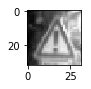

In [38]:
index = random.randint(0, len(X_rotated))
print(index)
image = X_rotated[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap= plt.get_cmap('gray'))
print(y_rotated[index])


In [39]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_whole = np.concatenate((X_train, X_noise,X_scaled, X_rotated), axis=0)
y_whole = np.concatenate((y_train, y_noise, y_scaled, y_rotated), axis=0)


X_whole, y_whole = shuffle(X_whole, y_whole)


n_whole = len(X_whole)

#Choose 20% of the examples as validation set
n_valid = int(n_whole*.2)
X_validation = X_whole[:n_valid]
y_validation = y_whole[:n_valid]

X_whole = X_whole[n_valid:]
y_whole = y_whole[n_valid:]

n_whole = len(X_whole)

print('Number of Training Examples(after remov validation set) =', n_whole)
print('Number of Validation Examples =', n_valid)

Number of Training Examples(after remov validation set) = 252333
Number of Validation Examples = 63083


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Data augmentation(data generation): After experimentation with various architectures like multi stage connection from CNN layesrs, mutiple fully connected layers, I was able to get atmost 87% accuracy on test data.

From the Serment paper, they suggested adding noise, scaling, rotation to existing data to get the additional data. 
With those suggesstions, I have added those three things, I was able to get additional 3 times the actual data. total 4 times including the original data.  Using this data I was able to get around at 93.4% accuracy on test data at best(see below for various architectures experimented). 
After that to get addional juice, I plotted distribution of the training data for each class. From the training data a lot of classes have very few instances of training data. So, for each class with number of samples less the 1400 in original data, I did upsampling to get numbers in the range of 1400 and 2250(max # examples a class).
Used the same adding noise, scaling, rotation to the sampled data as well. 
With the total data I got is  316788


From This data I used 80% for training and 20% validation
traing data = 253431
validation data = 63357

Testing I have used original test data  =12630 (untouched)


In [4]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#with 1st layer 108 and 2ndlayer 8640 filters

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 30
BATCH_SIZE = 128



def ts_cnn(x, keep_prob):
    mu = 0.0
    sigma = 0.1
    
    W_L1 = tf.Variable(tf.truncated_normal((5,5,1,32), mean=mu, stddev=sigma))
    b_L1 = tf.Variable(tf.zeros(32))
    strides = [1,1, 1, 1]
    padding = 'VALID'
    conv1 = tf.nn.conv2d(x, W_L1, strides, padding)
    conv1 = tf.nn.bias_add(conv1, b_L1)
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    print(tf.shape(conv1))
                       
    # TODO: Pooling. Input = 28x28x32. Output = 14x14x32.
    pool1 = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1],'VALID' )
    
    pool11 = tf.nn.max_pool(conv1, [1,4,4,1], [1,4,4,1],'VALID' )
    
    # Layer 2: Convolutional. Output = 10x10x64.
    W_L2 = tf.Variable(tf.truncated_normal((5,5,32,64), mean=mu, stddev=sigma))
    b_L2 = tf.Variable(tf.zeros(64))
    strides = [1,1, 1, 1]
    padding = 'VALID'
    conv2 = tf.nn.conv2d(pool1, W_L2, strides, padding)
    conv2 = tf.nn.bias_add(conv2, b_L2)
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
                       
    # TODO: Pooling. Input = 10x10x64. Output = 5x5x64.
    pool2 = tf.nn.max_pool(conv2, [1,2,2,1], [1,1,1,1],'VALID' )
    
       
    # Layer 2: Convolutional. input=10x10x64. Output = 10x10x128.
    W_L3 = tf.Variable(tf.truncated_normal((5,5,64,128), mean=mu, stddev=sigma))
    b_L3 = tf.Variable(tf.zeros(128))
    strides = [1,1, 1, 1]
    padding = 'VALID'
    conv3 = tf.nn.conv2d(pool2, W_L3, strides, padding)
    conv3 = tf.nn.bias_add(conv3, b_L3)
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)
    
                       
    # TODO: Pooling. Input = 10x10x128. Output = 5x5x128.
    pool3 = tf.nn.max_pool(conv3, [1,2,2,1], [1,2,2,1],'VALID' )   
        
        
    #input 14*14*32 output = 6272
    flat_vec1 = flatten(pool11)
    # TODO: Flatten. Input = 5x5x64. Output = 1600.
    flat_vec2 = flatten(pool2) #tf.reshape(pool2, [-1, 400])   
    
    # TODO: Flatten. Input = 5x5x128. Output = 3200.
    flat_vec3 = flatten(pool3)
    
    print(tf.shape(flat_vec1))
    print(tf.shape(flat_vec2))
    print(tf.shape(flat_vec3))
    flat_vec = tf.concat(1, [flat_vec1, flat_vec2, flat_vec3])
    
    # Layer 3: Fully Connected. Input = 7264. Output = 128.
    W_fc3 = tf.Variable(tf.truncated_normal([7264,128], mean=mu, stddev=sigma))
    b_fc3 = tf.Variable(tf.zeros([128]))
    
    
    # Activation.
    fc3 = tf.nn.relu(tf.matmul(flat_vec,W_fc3)+b_fc3)
   

    ## Layer 4: Fully Connected. Input = 512. Output = 128.
    #W_fc4 = tf.Variable(tf.truncated_normal([512, 128], mean=mu, stddev=sigma))
    #b_fc4 = tf.Variable(tf.zeros([128]))
    
    # Activation.
    #fc4 = tf.nn.relu(tf.matmul(fc3,W_fc4)+b_fc4)


    
    # Layer 5: Fully Connected. Input = 128. Output = n_classes.
    W_fc6 = tf.Variable(tf.truncated_normal([128, n_classes], mean=mu, stddev=sigma))
    b_fc6 = tf.Variable(tf.zeros([n_classes]))
    
    fc3_drop = tf.nn.dropout(fc3, keep_prob)
    # TODO: Activation.
    logits = tf.matmul(fc3_drop, W_fc6)+b_fc6
    return logits
    
    
    
    


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**


 Architecture:
 
  input(32X32X1) ==> CONV(5X5X32) ==> max_pool1(2X2) ==> CONV(5X5X64)=> max_pool(1X1) ==> CONV(5X5X128) ==>max_pool(2X2)    => relu(FC([ma_pool(pool1, 4X4);pool2; pool3)X128) == logits(128Xn_classes)


I have tried various combinations of architectures like 3 Conv and 2 fc layers, 2 conv layers and 3fc layers,
multi stage connections from conv layers to fully connected layers.

I have also tried filters with 108 filter for conv1 layer and 8640 filters for 2nd conv layers as described in the  Sermanet paper.  However my system has trouble training with insufficient memory. I disconitnued using that model.

Finally I settled on 3 CONV layers and 1 FC layers with connections from all three CONV layers along with dropout.


In [5]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)


In [42]:
#training main routine

rate = 0.001

logits = ts_cnn(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("Shape_14:0", shape=(4,), dtype=int32)
Tensor("Shape_15:0", shape=(2,), dtype=int32)
Tensor("Shape_16:0", shape=(2,), dtype=int32)
Tensor("Shape_17:0", shape=(2,), dtype=int32)


In [43]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [44]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_whole, y_whole = shuffle(X_whole, y_whole)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_whole[offset:end], y_whole[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.9})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.962

EPOCH 2 ...
Validation Accuracy = 0.983

EPOCH 3 ...
Validation Accuracy = 0.984

EPOCH 4 ...
Validation Accuracy = 0.992

EPOCH 5 ...
Validation Accuracy = 0.990

EPOCH 6 ...
Validation Accuracy = 0.992

EPOCH 7 ...
Validation Accuracy = 0.994

EPOCH 8 ...
Validation Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.994

EPOCH 10 ...
Validation Accuracy = 0.995

EPOCH 11 ...
Validation Accuracy = 0.992

EPOCH 12 ...
Validation Accuracy = 0.993

EPOCH 13 ...
Validation Accuracy = 0.993

EPOCH 14 ...
Validation Accuracy = 0.996

EPOCH 15 ...
Validation Accuracy = 0.995

EPOCH 16 ...
Validation Accuracy = 0.996

EPOCH 17 ...
Validation Accuracy = 0.995

EPOCH 18 ...
Validation Accuracy = 0.995

EPOCH 19 ...
Validation Accuracy = 0.996

EPOCH 20 ...
Validation Accuracy = 0.994

EPOCH 21 ...
Validation Accuracy = 0.996

EPOCH 22 ...
Validation Accuracy = 0.996

EPOCH 23 ...
Validation Accuracy = 0.997

EPOCH 24 ...
Validation Accura

In [45]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.953


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**


I have used Adam optimizer,

with learning rate = 0.001
batch size =128
epochs tried  20 to 100. 
Finally settled to 50 epochs. after additional data generation, I was to get 99.7% accuracy on validation data.

With the above architecture and hyper parameters, I was getting 93.8% accuracy on test data. and 99.7% on validation dataa.

So, I tried with drop out as 0.9(keep_prob), this increased test accuracy to 95% 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

1. Basic MNIST LeNet architecutre is used without changing data. got accurcy 
2. Converted to YUV channel , used Y channel only as described in Sermanet paper 
3. Tried multi stage connections as described in the  architecture
4. Next tired adding additional conv layer, more fully connected and start removing few layers.
5. finally I settled on 3 conv layers, one fc layer  with dropout(0.9) as it was giving 99.7% accuracy on validation and test 95% on test data.







---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

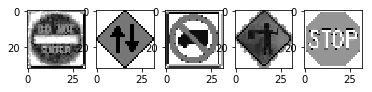

In [46]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from skimage import io
from skimage import img_as_ubyte
from skimage import transform
from skimage import exposure
import numpy as np
import tensorflow as tf

images = []
img = img_as_ubyte(io.imread('myimages/donotenter.jpeg'))
images.append(transform.resize(img,(32,32)))
img = img_as_ubyte(io.imread('myimages/oncoming_traffic.png'))
images.append(transform.resize(img,(32,32)))
img = img_as_ubyte(io.imread('myimages/notruck.png'))
images.append(transform.resize(img,(32,32)))
img = img_as_ubyte(io.imread('myimages/temporary_stop.jpeg'))
images.append(transform.resize(img,(32,32)))
img = img_as_ubyte(io.imread('myimages/stop.png'))
images.append(transform.resize(img,(32,32)))
a = np.array(images)

a = 0.299*a[:,:,:,0]+0.587*a[:,:,:,1]+0.114*a[:,:,:,2]
a = (a/255.).astype(np.float32)  #scale between 0 and 1

for i in range(a.shape[0]):
    a[i] = exposure.equalize_hist(a[i])

a = a.reshape(a.shape+(1,))
img_cnt = len(images)

fig = plt.figure()
for i in range(img_cnt):
    b= fig.add_subplot(1,img_cnt,i+1)
    plt.imshow(a[i].squeeze(), cmap= plt.get_cmap('gray'))


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I tried selecting images such that each on shows diffrent property, one with text, construction worker etc.
As hown above the I thought It will be difficult classify DO NOT ENTER, construction worker stop symbol.

In [55]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

_, scoring = tf.nn.top_k(logits, 1)     
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    scored_labels, logit_vals = sess.run([scoring, logits], feed_dict={x: a, keep_prob:1.0})
    
    print("scored labels = {:}".format(scored_labels[:,0]))



scored labels = [17 35 16 12  1]


In [ ]:
sign names recognized:
======
17: No Entry
35: Ahead Only
16: Vehicles over 3.5 metric tons prohibited
12: Priority road
1: Speed Limit (30km/h)



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Yes, as plotted below, each image  it assigned highest confidence to one classe. and Negligible probability to the rest of the classes. 

My model correctly classified 4 out 5 images I have uploaded, resulting 80% accuracy.
For the last one it idenitfied as 1: Speed Limit (30km/h) actually it is 14: Stop.It is still in my top 5 classes identified.



[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.95217979e-01   2.73857103e-03   2.04337039e-03   1.09179361e-07
    1.10535625e-08]
 [  9.99962091e-01   3.78798904e-05   9.89676136e-12   4.75672193e-12
    1.67528114e-13]
 [  9.99999881e-01   1.15972846e-07   7.54354981e-11   6.15501920e-12
    4.66478809e-12]
 [  9.95868564e-01   2.87353690e-03   5.61560038e-04   2.09004822e-04
    1.60708238e-04]]
[[17  0  1  2  3]
 [35 37 40 33 12]
 [16 28  9 15 22]
 [12 35 36 14 38]
 [ 1 38 14  5 13]]


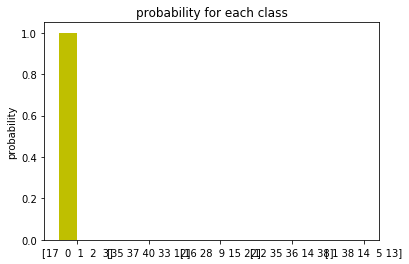

In [63]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    softmax_prob = tf.nn.softmax(tf.constant(logit_vals))
    top5_pr_vals, top5_id_vals = sess.run(tf.nn.top_k(softmax_prob, 5, sorted=True) )

print(top5_pr_vals)
print(top5_id_vals)
    
fig,ax = plt.subplots()
ind = np.arange(5)
rects = ax.bar(ind, top5_pr_vals[0], width, color='y')
ax.set_ylabel('probability')
ax.set_title('probability for each class')
ax.set_xticks(ind+width/2)
ax.set_xticklabels(top5_id_vals)

plt.show()


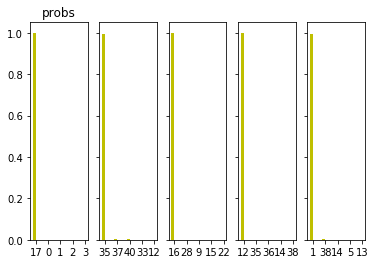

In [67]:

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True)
ind = np.arange(5)
ax1.set_title('probs')
rects = ax1.bar(ind, top5_pr_vals[0], width, color='y')
ax1.set_xticks(ind+width/2)
ax1.set_xticklabels(top5_id_vals[0])

rects = ax2.bar(ind, top5_pr_vals[1], width, color='y')
ax2.set_xticks(ind+width/2)
ax2.set_xticklabels(top5_id_vals[1])

rects = ax3.bar(ind, top5_pr_vals[2], width, color='y')
ax3.set_xticks(ind+width/2)
ax3.set_xticklabels(top5_id_vals[2])

rects = ax4.bar(ind, top5_pr_vals[3], width, color='y')
ax4.set_xticks(ind+width/2)
ax4.set_xticklabels(top5_id_vals[3])

rects = ax5.bar(ind, top5_pr_vals[4], width, color='y')
ax5.set_xticks(ind+width/2)
ax5.set_xticklabels(top5_id_vals[4])

plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

As described above, out of 5 images last one stop sign is recognized as 30/km speed limit sign.  for that image, stop sign is  the 3rd   among the predicted classes.  it looks like in the in the misclassfied example(STOP sign) it looks like 'ST' is recognized as '3' and 'O' as 0.

Overall, I am impressed with performance of the model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.